In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
# import matplotlib.pyplot as pt
# %matplotlib inline 
import warnings 

In [102]:
warnings.filterwarnings('ignore') 


In [103]:
df=pd.read_csv("car_evaluation.csv")

In [104]:
df.shape

(1727, 7)

In [105]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [106]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [107]:
df.columns = col_names

In [108]:
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [109]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [111]:
# col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [112]:
for col in col_names:
    
    print(df[col].value_counts()) 

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [113]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [114]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [115]:
X = df.drop(['class'], axis=1)
y = df['class']

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [117]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [118]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [119]:
X_train.head() 

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [120]:
import category_encoders as ce


In [121]:
pip install category_encoders 

In [122]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [123]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [124]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
model1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [127]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [128]:
y_pred_gini = model1.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


In [130]:
y_pred_train_gini = model1.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [131]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7848


In [132]:
print('Training set score: {:.4f}'.format(model1.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model1.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


[Text(111.60000000000001, 190.26, 'X[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(167.4, 27.180000000000007, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(279.0, 27.180000000000007, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

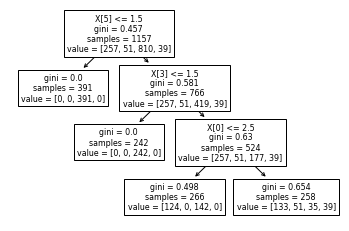

In [133]:
from sklearn import tree

tree.plot_tree(model1.fit(X_train, y_train)) 

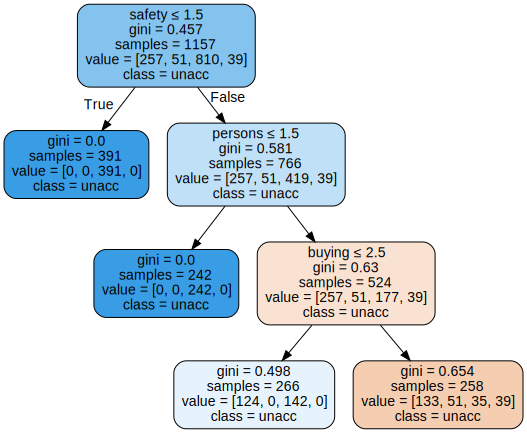

In [136]:
import graphviz 
dot_data = tree.export_graphviz(model1, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [135]:
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred_gini)

# print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]
